In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [1]:
cars_data = pd.read_csv('UsedCarsPrice.csv',index_col=0,na_values=['??',"???","????"])
cars_data.head(10)

<IPython.core.display.Javascript object>

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,Petrol,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105


In [45]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [46]:
cars_data.shape

(1436, 10)

In [3]:
# Create copies of original data
cars = cars_data.copy()            


### Identifying Missing Values
- In Pandas dataframes, missing data is represented by NaN (an acronym for Not a Number)
- To check null values in Pandas dataframes, *isnull()* and *isna()* are used
- These functions returns a dataframe of Boolean values which are True for NaN values

In [48]:
# Check the count of missing values in each column
cars.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [49]:
cars.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


<Axes: >

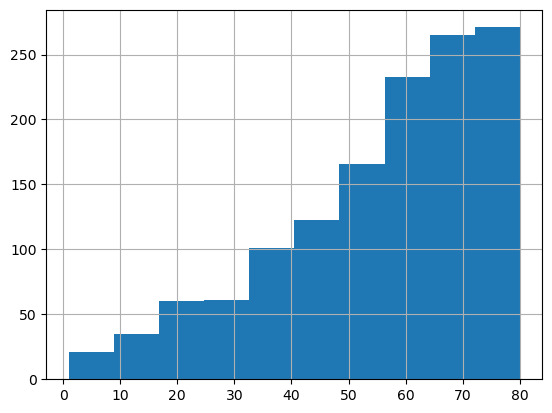

In [50]:
cars['Age'].hist()

***NOTE:*** The attributes Age, Kilometers, FuelType, HP and MetColor have missing values

In [51]:
# Subsetting the rows that have one or more missing values
missing = cars[cars.isnull().any(axis=1)]
missing.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105
15,22000,28.0,18739.0,Petrol,NaN,0.0,0,1800,3,1185


In [4]:
cars['Age'].fillna(cars['Age'].median(), inplace=True)


In [18]:
df1 = cars[['Age','Price','KM']]
df1.head()

,Age,Price,KM
0,23.0,13500,46986.0
1,23.0,13750,72937.0
2,24.0,13950,41711.0
3,26.0,14950,48000.0
4,30.0,13750,38500.0


In [19]:
df1.to_csv("Usedcars.csv")

In [53]:
cars.isna().sum()

Price          0
Age            0
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [16]:
#Calculate median of Kilometers
cars['KM'].median()

63634.0

In [17]:
cars['KM'].fillna(cars['KM'].median(), inplace=True)
#cars['KM'] = cars['KM'].fillna(cars['KM'].median())

In [56]:
cars.isna().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [57]:
#Calculate mean of HP
cars['HP'].mean()

101.47832167832168

In [58]:
cars['HP'].fillna(cars['HP'].median(), inplace=True)
cars.isna().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [59]:
cars['FuelType'].value_counts()

FuelType
Petrol    1177
Diesel     144
CNG         15
Name: count, dtype: int64

In [60]:
cars['FuelType'].value_counts().index[0]

'Petrol'

In [61]:
#Alternatively
cars['FuelType'].mode()

0    Petrol
Name: FuelType, dtype: object

In [62]:
cars['FuelType'].mode()[0]

'Petrol'

In [63]:
# Alternatively,
cars['FuelType'].fillna(cars['FuelType'].mode()[0], inplace=True)

In [64]:
cars['MetColor'].mode()

0    1.0
Name: MetColor, dtype: float64

In [65]:
cars['MetColor'].fillna(cars['MetColor'].mode()[0], inplace=True)
cars.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [66]:
cars.head()  #missing values have been imputed

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [67]:
cars.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [68]:
cars['Doors'].value_counts()

Doors
5        673
3        621
4        137
2          2
three      1
four       1
five       1
Name: count, dtype: int64

***NOTE:*** 
- Number of doors for a car must be an integer. 
- But the data contains values like 'three', 'five' etc. 
- These alphabetical have to be replaced by equivalent numbers
- Then the data type of the attribute must be converted into integer type

In [69]:
cars['Doors'].replace({'three':'3','four':4,'five':5}, inplace=True)
cars.Doors.value_counts()

Doors
5    673
3    622
4    137
2      2
4      1
5      1
Name: count, dtype: int64

In [70]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [71]:
#The attribute 'Doors' is objec type. It must be Integer type
cars['Doors']=cars['Doors'].astype(int)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int32  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 117.8+ KB


#### Using get_dummies() 

In [72]:
cars_dataEncoded=pd.get_dummies(cars,drop_first=True,dtype='int')
cars_dataEncoded.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,1,0
1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,1,0
2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,1,0
3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,1,0
4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,1,0
5,12950,32.0,61000.0,90.0,0.0,0,2000,3,1170,1,0
6,16900,27.0,63634.0,110.0,1.0,0,2000,3,1245,1,0
7,18600,30.0,75889.0,90.0,1.0,0,2000,3,1245,0,1
8,21500,27.0,19700.0,192.0,0.0,0,1800,3,1185,0,1
9,12950,23.0,71138.0,110.0,1.0,0,1900,3,1105,1,0


# Data Normalization/Standardization
- Normalization of data is to make sure that our feature values fall into certain range
- Min-max normalization
    - Guarantees that all features will have exactly the same scale (0 to 1)
    - cannot handle outliers
- Z score Normalization
    - All features may not fall under same scale, but most of the data points will be between -3 to +3
   


In [73]:
cars_dataEncoded.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165,1,0
1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165,1,0
2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165,1,0
3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165,1,0
4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170,1,0


In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [75]:
cnames = ["Age", "KM", "HP", "CC","Doors", "Weight"]
sc = StandardScaler()

In [76]:
sc.fit_transform(cars_dataEncoded)

array([[ 0.76376268, -1.83615212, -0.58201085, ...,  1.75856113,
         2.99536679, -2.83398069],
       [ 0.83271485, -1.83615212,  0.11695033, ...,  1.75856113,
         2.99536679, -2.83398069],
       [ 0.88787659, -1.78046649, -0.72408708, ...,  1.75856113,
         2.99536679, -2.83398069],
       ...,
       [-0.6152808 ,  0.22421608, -1.3892193 , ..., -1.09191497,
        -0.33384893,  0.35286056],
       [-0.96004167,  0.78107235, -0.13361558, ..., -1.09191497,
        -0.33384893,  0.35286056],
       [-1.04278428,  1.11518612, -1.8474993 , ...,  0.78939926,
        -0.33384893,  0.35286056]])

In [77]:
pd.DataFrame(sc.fit_transform(cars_dataEncoded),columns=cars_dataEncoded.columns)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,0.763763,-1.836152,-0.582011,-0.781004,0.640788,-0.242893,2.314976,-1.085139,1.758561,2.995367,-2.833981
1,0.832715,-1.836152,0.116950,-0.781004,0.640788,-0.242893,2.314976,-1.085139,1.758561,2.995367,-2.833981
2,0.887877,-1.780466,-0.724087,-0.781004,0.640788,-0.242893,2.314976,-1.085139,1.758561,2.995367,-2.833981
3,1.163685,-1.669095,-0.554700,-0.781004,-1.560579,-0.242893,2.314976,-1.085139,1.758561,2.995367,-2.833981
4,0.832715,-1.446353,-0.810572,-0.781004,-1.560579,-0.242893,2.314976,-1.085139,1.853577,2.995367,-2.833981
...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.224216,-1.294197,-1.052329,0.640788,-0.242893,-1.425994,-1.085139,-0.901883,-0.333849,0.352861
1432,0.031491,0.892444,-0.133616,-1.052329,-1.560579,-0.242893,-1.425994,-1.085139,-1.091915,-0.333849,0.352861
1433,-0.615281,0.224216,-1.389219,-1.052329,-1.560579,-0.242893,-1.425994,-1.085139,-1.091915,-0.333849,0.352861
1434,-0.960042,0.781072,-0.133616,-1.052329,0.640788,-0.242893,-1.425994,-1.085139,-1.091915,-0.333849,0.352861


In [78]:
s = np.array([1,2,3,4])
s.reshape(-1,2)

array([[1, 2],
       [3, 4]])

In [79]:
#Save numerical columns in a list

for col in cnames:
    cars_dataEncoded[col] = sc.fit_transform(cars_dataEncoded[col].values.reshape(-1,1))

cars_dataEncoded.head()
#dependent variable = Price = y 
# independent variables = x(Age	KM	HP	MetColor	Automatic	CC	Doors	Weight	FuelType_Diesel	FuelType_Petrol)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,-1.836152,-0.582011,-0.781004,1.0,0,2.314976,-1.085139,1.758561,1,0
1,13750,-1.836152,0.116950,-0.781004,1.0,0,2.314976,-1.085139,1.758561,1,0
2,13950,-1.780466,-0.724087,-0.781004,1.0,0,2.314976,-1.085139,1.758561,1,0
3,14950,-1.669095,-0.554700,-0.781004,0.0,0,2.314976,-1.085139,1.758561,1,0
4,13750,-1.446353,-0.810572,-0.781004,0.0,0,2.314976,-1.085139,1.853577,1,0


# Linear Regression --- For Concept Purpose only)
- Consider Age of the car as an indepedent variable and Price as dependent variable.
- We will build a simple linear regression model using these two variables

In [80]:
df = cars_dataEncoded.copy()
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,-1.836152,-0.582011,-0.781004,1.0,0,2.314976,-1.085139,1.758561,1,0
1,13750,-1.836152,0.116950,-0.781004,1.0,0,2.314976,-1.085139,1.758561,1,0
2,13950,-1.780466,-0.724087,-0.781004,1.0,0,2.314976,-1.085139,1.758561,1,0
3,14950,-1.669095,-0.554700,-0.781004,0.0,0,2.314976,-1.085139,1.758561,1,0
4,13750,-1.446353,-0.810572,-0.781004,0.0,0,2.314976,-1.085139,1.853577,1,0


<Axes: xlabel='Age', ylabel='Price'>

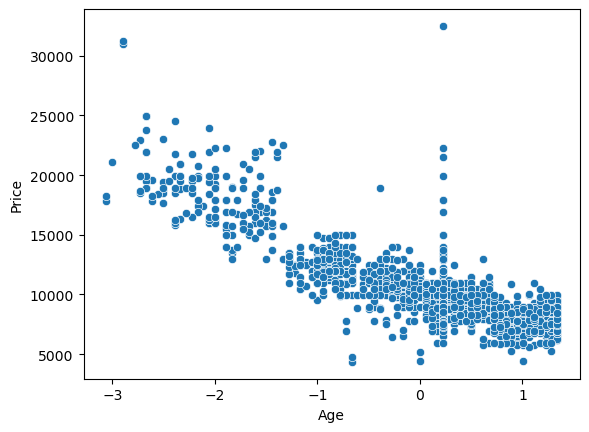

In [81]:
import seaborn as sns
sns.scatterplot(x='Age',y='Price',data=df)

In [11]:
import statsmodels.api as sma

***NOTE:*** 
1. *OLS() Model*:
    - Ordinary Least Squares
    - one can give dependent and independent variables directly as parameters.
    - The constant value (intercept) has to be explicitly added to independent variables
    

In [83]:
x = df['Age']
y = df['Price']
x = sma.add_constant(x)
model = sma.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     3573.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:27:02   Log-Likelihood:                -12909.
No. Observations:                1436   AIC:                         2.582e+04
Df Residuals:                    1434   BIC:                         2.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.073e+04     51.241    209.417      0.000    1.06e+04    1.08e+04
Age        -3062.7559     51.241    -59.771      0.000   -3163.272   -2962.240
==============================================================================
Omnibus:                      793.789   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19100.825
Skew:                           2.075   Prob(JB):                         0.00
Kurtosis:                      20.379   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
x = df.drop('Price',axis=1)
y = df['Price']
x = sma.add_constant(x)
model = sma.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     744.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:27:03   Log-Likelihood:                -12494.
No. Observations:                1436   AIC:                         2.501e+04
Df Residuals:                    1425   BIC:                         2.507e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9772.4016    392.464     24.900      0.000    9002.533    1.05e+04
Age             -2081.3458     51.891    -40.110      0.000   -2183.138   -1979.554
KM               -708.5027     53.534    -13.235      0.000    -813.517    -603.488
HP                391.8286     70.583      5.551      0.000     253.370     530.287
MetColor          106.4291     85.465      1.245      0.213     -61.221     274.079
Automatic          47.3253    172.432      0.274      0.784    -290.922     385.572
CC               -253.6677     88.839     -2.855      0.004    -427.938     -79.398
Doors            -102.7571     41.503     -2.476      0.013    -184.171     -21.343
Weight           1406.1331     63.172     22.259      0.000    1282.212    1530.054
FuelType_Diesel   451.1570    501.083      0.900      0.368    -531.782    1434.096
FuelType_Petrol   939.0742    390.059      2.408      0.016     173.922    1704.226
==============================================================================
Omnibus:                      359.365   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10117.631
Skew:                          -0.522   Prob(JB):                         0.00
Kurtosis:                      15.962   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df2 = pd.read_csv("Usedcars.csv")

<IPython.core.display.Javascript object>

In [24]:
x = df2.drop('Price',axis=1)
y = df2['Price']
x = sma.add_constant(x)
model = sma.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1413.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:52:38   Log-Likelihood:                -12819.
No. Observations:                1436   AIC:                         2.565e+04
Df Residuals:                    1432   BIC:                         2.567e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           2e+04    187.312    106.773      0.000    1.96e+04    2.04e+04
Unnamed: 0    -1.2915      0.258     -5.005      0.000      -1.798      -0.785
Age         -121.8025      6.582    -18.506      0.000    -134.713    -108.892
KM            -0.0222      0.002    -13.855      0.000      -0.025      -0.019
==============================================================================
Omnibus:                      759.028   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14009.618
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      17.751   Cond. No.                     3.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
# y = b0 + b1 x
# Price = 10730 -3062.7559(Age)

### Visualization of Actual v/s Predicted Values

In [86]:
ypred = model.predict(x) # predicted values
pd.DataFrame({'Y_actual':y,"Y_predicted":ypred}).head()

,Y_actual,Y_predicted
0,13500,16255.034016
1,13750,15759.818135
2,13950,16239.794361
3,14950,15781.551881
4,13750,15632.838575


<Axes: xlabel='Age', ylabel='Price'>

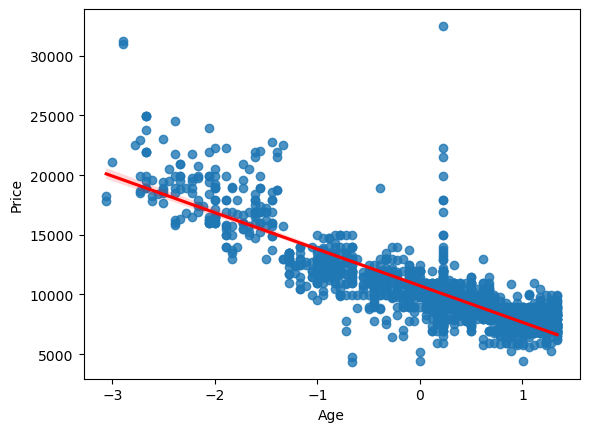

In [104]:
import seaborn as sns
x1 = df['Age']
y1 = df['Price']
#sns.scatterplot(x='Age',y='Price',data=df)
sns.regplot(x='Age',y='Price',data=df,line_kws={"color": "red"})

### Explanation of the output:

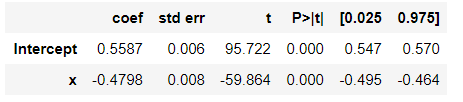

- ***coef:*** The value of intercept and coefficients for each independent variable is shown here.
- ***std err:*** Standard error of the model with respect to intercept and independent variables
- ***t:*** The value of t-statistics
- ***P>|t|*** This is p-value. This indicates whether the null hypothesis (that Age and Price are independent) is accepted or not. p value greater than 0.05 means the Ho is accepted at 95% confidence level. p-value near to 0 means the target variable is influenced by the independent variable.
- ***[0.025	0.975]*** This is the confidence interval. The value of coefficient falling between these two values indicates there is dependency between the variables. 

- ***R-squared:*** The percentage of variation in dependent variable is explained by the independent variables. In this example, 71.4% of variability in Price is explained by Age.
- ***Adj. R-squared:*** This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.
- ***F-statistic:*** Value of F-Statistic
- ***Prob (F-statistic):*** This tells the overall significance of the regression. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is zero. This implies that overall the regressions is meaningful.

### Build a model with another independent variable


In [88]:
x = df[['Age','KM']]
y = df['Price']
x = sma.add_constant(x)
model = sma.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     2072.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:27:03   Log-Likelihood:                -12831.
No. Observations:                1436   AIC:                         2.567e+04
Df Residuals:                    1433   BIC:                         2.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.073e+04     48.553    221.011      0.000    1.06e+04    1.08e+04
Age        -2709.9972     55.816    -48.553      0.000   -2819.487   -2600.508
KM          -715.1718     55.816    -12.813      0.000    -824.661    -605.682
==============================================================================
Omnibus:                      820.801   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18108.553
Skew:                           2.207   Prob(JB):                         0.00
Kurtosis:                      19.827   Cond. No.                         1.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $R^2$ and Adjusted $R^2$
- The value of $R^2$ may increase or remain constant as we keep adding additional independent variables to the model.
- The value of Adjusted $R^2$ may increase or decreases as number of independent variables increases.
    - Treats $R^2$ as Penalization factor for a bad variable and rewarding factor for a good or significant variable. 
- Adjusted $R^2$ is thus a better model evaluator and can correlate the variables more efficiently than $R^2$.

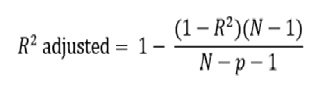

$R^2$ = value of $R^2$ 

p = Number of predictors (independent variables)

N = total sample size


#### Build a model with all indepedent variables

## Dividing data into train and test 

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X= df.drop(['Price'],axis=1)
y= df['Price']


In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 10)
(288, 10)
(1148,)
(288,)


In [93]:
X_train.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
366,-1.167925,-1.257566,-0.306185,0.0,0,-0.891569,-1.085139,-0.901883,0,1
1141,0.948129,0.929923,-1.052329,1.0,0,-1.425994,1.014941,-0.711851,0,1
1337,1.059500,-0.133616,0.575621,1.0,0,0.177279,-0.035099,-0.711851,0,1
139,-2.003209,-1.228047,0.575621,1.0,0,0.177279,1.014941,1.093450,0,1
271,-1.000868,-0.549394,0.575621,1.0,0,0.177279,1.014941,0.048275,0,1


In [94]:
X_train = sma.add_constant(X_train)
X_test = sma.add_constant(X_test)

In [95]:
model1 = sma.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     596.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:27:12   Log-Likelihood:                -9968.8
No. Observations:                1148   AIC:                         1.996e+04
Df Residuals:                    1137   BIC:                         2.002e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9551.4134    403.595     23.666      0.000    8759.539    1.03e+04
Age             -2082.1144     57.459    -36.236      0.000   -2194.853   -1969.376
KM               -718.5632     59.172    -12.144      0.000    -834.663    -602.464
HP                565.0675     82.673      6.835      0.000     402.859     727.276
MetColor          101.5041     94.885      1.070      0.285     -84.665     287.673
Automatic         166.0005    180.805      0.918      0.359    -188.749     520.750
CC               -384.3717    102.659     -3.744      0.000    -585.794    -182.950
Doors             -51.5421     45.606     -1.130      0.259    -141.023      37.939
Weight           1202.4130     70.070     17.160      0.000    1064.931    1339.895
FuelType_Diesel  1556.2274    546.223      2.849      0.004     484.508    2627.946
FuelType_Petrol  1032.1048    401.120      2.573      0.010     245.086    1819.123
==============================================================================
Omnibus:                      233.100   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4575.703
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                      12.753   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
y_pred = model1.predict(X_test) 
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head()

,Actual,Predicted
995,9950,9553.111213
514,10500,10043.430855
612,7750,8175.820467
307,13500,12406.812339
981,9750,10777.795894


In [255]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [227]:
mean_absolute_error(y_test,y_pred)

1095.2633809009474

In [228]:
mean_absolute_percentage_error(y_test,y_pred)

0.10489592710852985

In [229]:
mean_squared_error(y_test,y_pred)

2466243.0972507605

In [230]:
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred)) #RMSE

1570.4276797263733

### Residual Plot

In [231]:
[0]*5

[0, 0, 0, 0, 0]

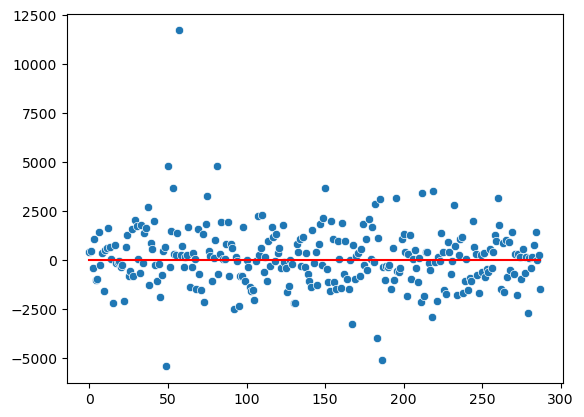

In [232]:
residue = y_test - y_pred
x1 = [i for i in range(0,len(residue))]
sns.scatterplot(x=x1,y=residue)
plt.plot(x1,[0]*residue,c='r')
#The residual plot has all the points scattered, then linear regression is the correct model. 
#That means, there is a linearity between independent and dependent variables.

<Axes: >

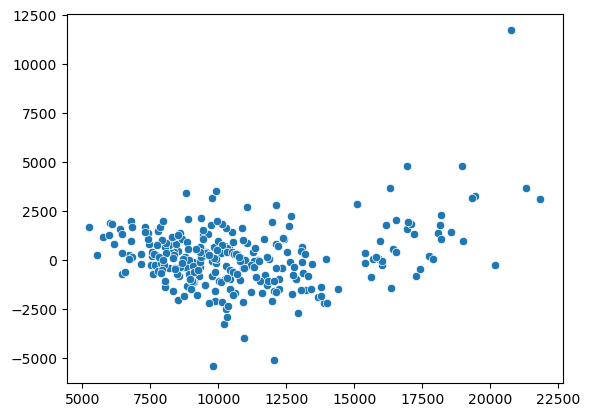

In [233]:
#Constant variance check - Homescedasticity check
#scatter plot - fitted values Vs residuals
sns.scatterplot(x=y_pred,y=residue)

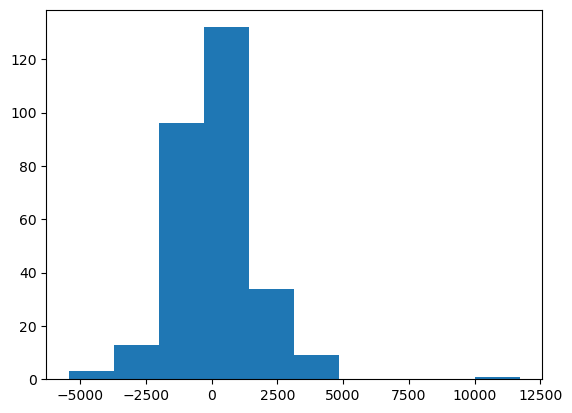

In [234]:
#Check for normality
plt.hist(residue);

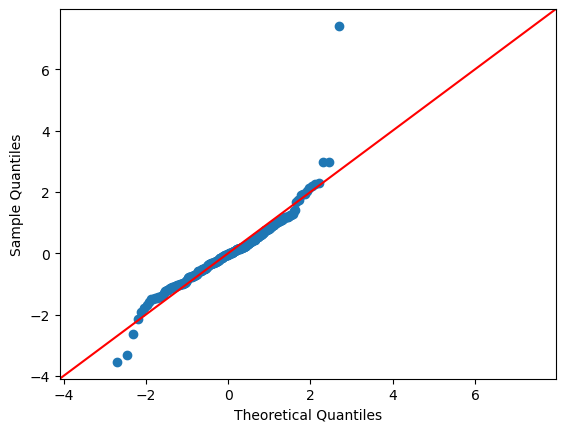

In [235]:
sma.qqplot(residue,fit=True,line='45'); #Check for normality
#Assumption - Normality: The residuals of the model are normally distributed.

In [236]:
#Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [237]:
[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

[1.0005138261066506,
 1.7793265852321218,
 1.801936147132951,
 1.1568741115943149,
 2.061076932124929,
 2.2026330890209973]

In [238]:
vif = pd.DataFrame()
vif['Variance Inflation factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Features'] = X_train.columns
vif

,Variance Inflation factor,Features
0,1.000514,const
1,1.779327,Age
2,1.801936,KM
3,1.156874,HP
4,2.061077,CC
5,2.202633,Weight


OLS - Best Linear Unbiased Estimator (BLUE)

## Using sklearn Package for Linear Regression

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
lr = LinearRegression()

In [241]:
lr.fit(X_train,y_train)

LinearRegression()

In [242]:
lr.coef_ # coeeficients of independent variables

array([    0.        , -2074.38767957,  -758.47769746,   455.8571866 ,
        -255.76555731,  1197.9518995 ])

In [243]:
lr.intercept_ #constant b0

10708.584004766068

In [254]:
ypredicted = lr.predict(X_test) # predicted y
pd.DataFrame({'Actual':y_test,'Predicted':ypredicted}).head()

,Actual,Predicted
995,9950,9553.111213
514,10500,10043.430855
612,7750,8175.820467
307,13500,12406.812339
981,9750,10777.795894


In [246]:
r2_score(y_test,ypredicted)

0.831932751098242

## Evaluation metrics for Regression Models

In [252]:
print(f'MAE:{mean_absolute_error(y_test,ypredicted)}')
print(f'MAPE:{mean_absolute_percentage_error(y_test,ypredicted)}')
print(f'MSE:{mean_squared_error(y_test,ypredicted)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,ypredicted))}')
print(f'R2_score:{r2_score(y_test,ypredicted)}')

MAE:1095.2633809009474
MAPE:0.10489592710852984
MSE:2466243.09725076
RMSE:1570.427679726373
R2_score:0.831932751098242


## OLS/Regression Assumptions
1. ***Linear relationship:*** There exists a linear relationship between the independent variable X and the dependent variable Y.
    - Draw a scatter plot of X and Y. Visually, you can observe the linearity.
    - During multivariate regression, if you cannot plot a scatter plot (of 2 dimensions), take a help of residual plot. 
        - The residual plot has all the points scattered, then linear regression is the correct model. That means, there is a linearity between independent and dependent variables.
        - If the residual plot has some parabolic shape means there is a non-linear (ex. quadratic) relationship between independent and dependent variables. In such a situations, Linear Regression is not a good model.
    - If you find non-linearity, you can try below given options:
        - Apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.
       

2. ***Independence:*** The residuals are independent. In particular, there is no correlation between consecutive residuals.
    - Observe the residual plot 


3. ***Homoscedasticity:*** The residuals have constant variance at every level of x.
    - When this is not the case, the residuals are said to suffer from heteroscedasticity.
    - The funnel shaped graph.
    - Possible Remedies:
        - Transform the dependent variable. 
        - Use weighted regression
        
 
4. ***Normality:*** The residuals of the model are normally distributed.
    - Check the assumption visually using Q-Q plots/histogram
    
5. ***Multicollinearity check***
    - use Variance Inflation factor

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation


The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The `Omnibus` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


The 'Cond. No' (1.5e+05) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity


#### Funnel-shaped graph representing heteroscadasticity

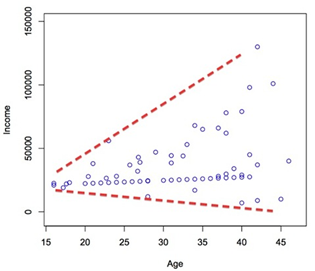

In [248]:
ypredtrain = model1.predict(X_train)

In [249]:
mean_absolute_percentage_error(y_train,ypredtrain)

0.1004672126625477

In [250]:
import numpy as np
np.sqrt(mean_squared_error(y_train,ypredtrain)) #RMSE

1436.7878146396981

In [256]:
ypredicted = model1.predict(X_test)
mean_absolute_percentage_error(y_test,ypredicted)

0.10489592710852985

In [265]:
from sklearn.linear_model import Ridge, Lasso
r=Ridge(alpha=.01)
r.fit(X_train,y_train)

Ridge(alpha=0.01)

In [266]:
y_pred=r.predict(X_test)

In [267]:
mean_absolute_percentage_error(y_test,y_pred)

0.10489596864131238

In [268]:
l=Lasso(alpha=0.01)
l.fit(X_train,y_train)

Lasso(alpha=0.01)

In [271]:
ypred1=l.predict(X_test)
mean_absolute_percentage_error(y_test,ypred1)

0.1048958957550185

In [ ]:
# To reduce overfitting use regularization techniques
# Both regularization techniques will shrink coefficients to almost zero so that model complexity is reduced.
# Lasso drops certain coeff to zero but ridge will reduce the coefficients
#lambda -learning rate

In [ ]:
#Ridge regression cost func = loss func+ lambda*||W||^2 - L2 regularization
#lasso regression cost func = loss func+ lambda*||W|| - Feature selection --- L1 regularization

## Bias, Variance, Underfitting, Overfitting
- ***Underfitting:*** The model is not fitting the data correctly. Fails to predict both training and testing data.
    - The model's performance will be bad on both training and testing data
    - Underfitting may happen due to over simplification of the model
- ***Overfitting:*** The model performs very well on training data, but fails to predict testing data properly.
    - Reasons:
        - Check train-test test split size. Do not keep too much % of data in training (limit to 80%-85%. But, if u give 90-95% data in training set, there will be overfit, because the model will memorize the data, instead of learning the patterns from the data)
        - Try to increase the size of your dataset. Normally overfitting will happen when the whole dataset size is small.
- ***Bias*** is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.
- ***Variance*** is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

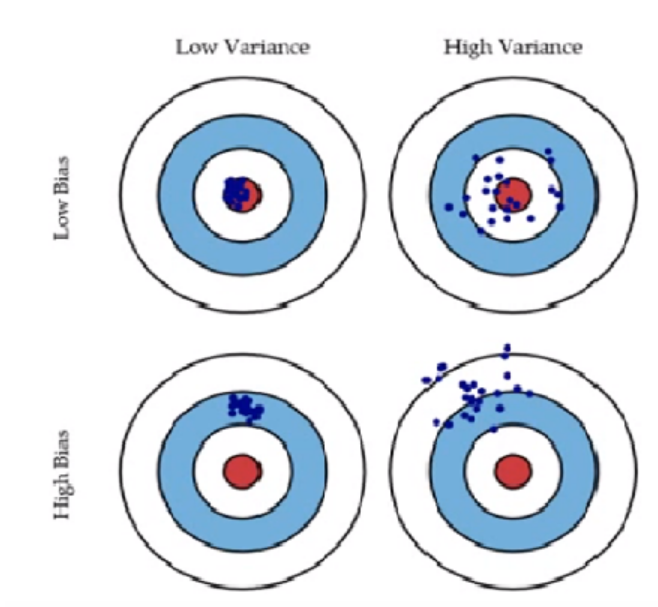

1. Top Left: Low Bias, Low Variance
- Interpretation: The model makes accurate predictions (low bias) and is consistent across different datasets or runs (low variance).<br>
- Visual: The points are tightly clustered around the center (bullseye), indicating good model performance.<br>
- Example: A well-tuned model with enough complexity to capture the true data distribution.<br>
2. Top Right: Low Bias, High Variance
- Interpretation: The model is accurate on average (low bias) but has high variance, meaning it performs inconsistently across different datasets or runs.
- Visual: The points are dispersed around the bullseye. While the average prediction is close to the true value, individual predictions vary widely.
- Example: A model that is overfitting the training data, performing well on it but poorly on new data.<br>
3. Bottom Left: High Bias, Low Variance
- Interpretation: The model consistently makes the same mistakes (high bias) but does so in a consistent manner (low variance).
- Visual: The points are tightly clustered, but away from the bullseye, indicating systematic errors (underfitting).
- Example: A model that is too simple (e.g., a linear model for non-linear data), resulting in underfitting.<br>
4. Bottom Right: High Bias, High Variance
- Interpretation: The model has both high bias and high variance, making it both inaccurate and inconsistent.
- Visual: The points are widely scattered and far from the bullseye, indicating poor performance overall.
- Example: A model that is poorly trained or both underfitting and overfitting, leading to suboptimal predictions.<br>

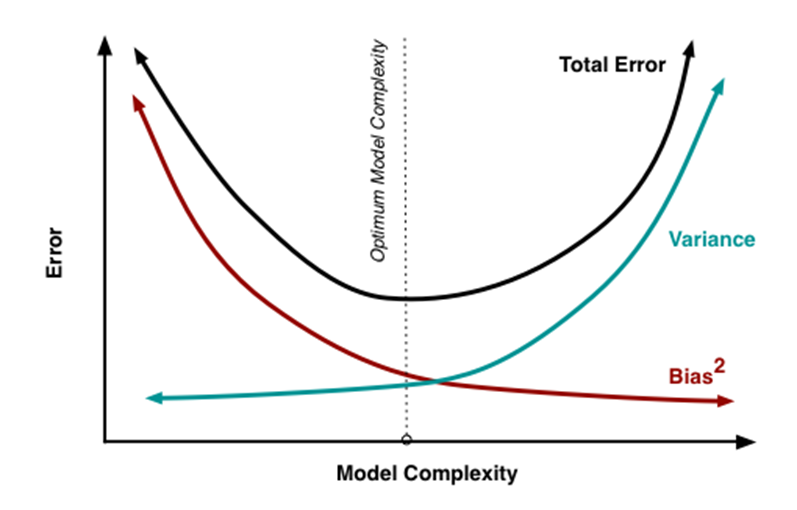